In [38]:
from inference import InferenceEngiene
from dictionary import AutoEncoder

import torch
import torch.nn.functional as F
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
model = 'EleutherAI/pythia-70m-deduped'
eng = InferenceEngiene(model)

In [8]:
df = pd.read_csv("car_sentences.csv", delimiter=",", encoding="utf-8", quotechar='"')
sentences = df['sentence'].tolist()

print(sentences)

['I need to get my car repaired after the accident.', 'The car was parked in front of the house for hours.', 'She drove her new car down the highway, feeling excited.', 'The car broke down on the way to the beach.', 'He washed his car every Saturday to keep it clean.', 'My car’s engine makes a strange noise when it starts.', 'They decided to buy a hybrid car for better fuel efficiency.', 'She ran to her car to avoid getting caught in the rain.', 'The car dealership offered a great discount on the latest models.', 'He reached into his car to grab his phone, which he had left behind.', 'The red sports car zoomed past us on the highway.', 'They rented a car for the weekend road trip.', 'His car was a classic, with a vintage design and polished chrome.', 'The police officer stopped the car for speeding.', 'I accidentally locked my keys inside the car.', "The car's air conditioning wasn’t working, and it was unbearably hot.", 'She bought a car with the money she saved up over the years.', '

In [34]:
token_emb = eng.get_token_embeddings([sentences[0]])
for token in token_emb[0]:
    if token.endswith('car'):
        car_token = torch.tensor(token_emb[0][token])

mlp_act = eng.get_mlp_activations(sentences, -1)

car_acts = []
car_acts.append(car_token)

for i in mlp_act:
    for token in mlp_act[i]:
        if token.endswith('car'):
            car_acts.append(mlp_act[i][token])



<Axes: >

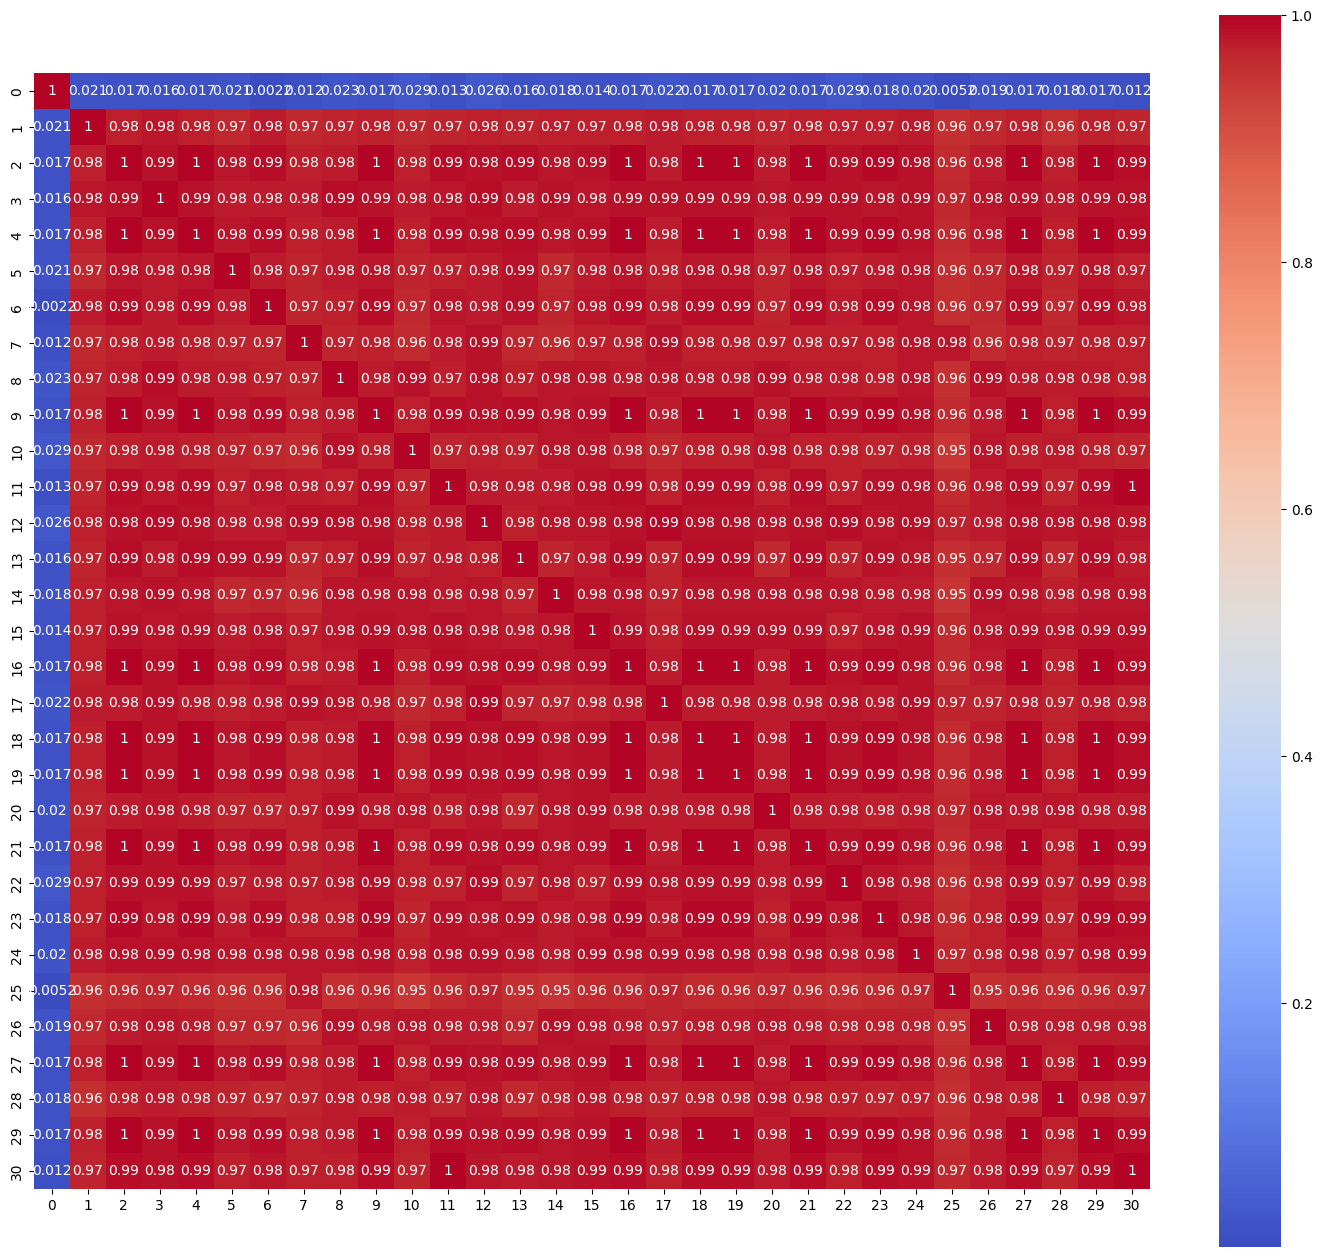

In [41]:
tensor_matrix = torch.stack(car_acts)
tensor_matrix_normalized = F.normalize(tensor_matrix, p=2, dim=1)
cosine_similarity_matrix = torch.mm(tensor_matrix_normalized, tensor_matrix_normalized.T)

plt.figure(figsize=(18, 16))
sns.heatmap(cosine_similarity_matrix.numpy(), annot=True, cmap='coolwarm', square=True, cbar=True)

In [13]:
for i in coeff_dict:
    for token in coeff_dict[i]:
        if token.endswith('car'):
            vals, inds = coeff_dict[i][token]
            print(vals)

[tensor([0.0970]), tensor([0.1259]), tensor([0.0040]), tensor([0.1119]), tensor([0.1932]), tensor([0.0269]), tensor([0.0503]), tensor([0.0271]), tensor([0.1001]), tensor([0.1480]), tensor([0.0176]), tensor([0.0685]), tensor([0.0882]), tensor([0.4202]), tensor([0.0695]), tensor([0.2269]), tensor([0.0445]), tensor([0.0612]), tensor([1.1722]), tensor([0.1583]), tensor([0.0611]), tensor([1.2648]), tensor([0.1094]), tensor([0.6650]), tensor([0.0645]), tensor([0.6200]), tensor([0.0224]), tensor([0.1640]), tensor([0.1774]), tensor([0.1177]), tensor([0.0453]), tensor([0.0344]), tensor([0.0142]), tensor([0.2082]), tensor([0.0728]), tensor([0.0976]), tensor([0.0733]), tensor([0.0342]), tensor([0.1837]), tensor([0.1023]), tensor([0.0472]), tensor([0.2608]), tensor([0.3435]), tensor([0.2239]), tensor([0.0997]), tensor([0.2013]), tensor([0.4079]), tensor([0.2997]), tensor([0.0800]), tensor([0.1895]), tensor([0.0188]), tensor([0.0898]), tensor([0.1331]), tensor([0.2456]), tensor([0.3325]), tensor([0

In [ ]:
all_coeffs = []

for i in coeff_dict:
    for j, token in enumerate(coeff_dict[i]):
        if j == 3 and token.endswith('the') == False:
            alpha, inds = coeff_dict[i][token]
            print
